# Load Libraries & Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('/kaggle/input/cryptocurrencypricehistory/coin_Ethereum.csv', parse_dates=['Date'], index_col="SNo")


# EDA & VISUALIZATION

In [53]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 1 to 2160
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       2160 non-null   object        
 1   Symbol     2160 non-null   object        
 2   Date       2160 non-null   datetime64[ns]
 3   High       2160 non-null   float64       
 4   Low        2160 non-null   float64       
 5   Open       2160 non-null   float64       
 6   Close      2160 non-null   float64       
 7   Volume     2160 non-null   float64       
 8   Marketcap  2160 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 168.8+ KB


,Date,High,Low,Open,Close,Volume,Marketcap
count,2160,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,2018-07-23 11:59:59,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
min,2015-08-08 23:59:59,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,2017-01-29 17:59:59,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,2018-07-23 11:59:59,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,2020-01-14 05:59:59,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2021-07-06 23:59:59,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11
std,NaN,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10


In [ ]:
plt.style.use('dark_background')

#your plot code

plt.tick_params(axis='y', colors='white')

plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

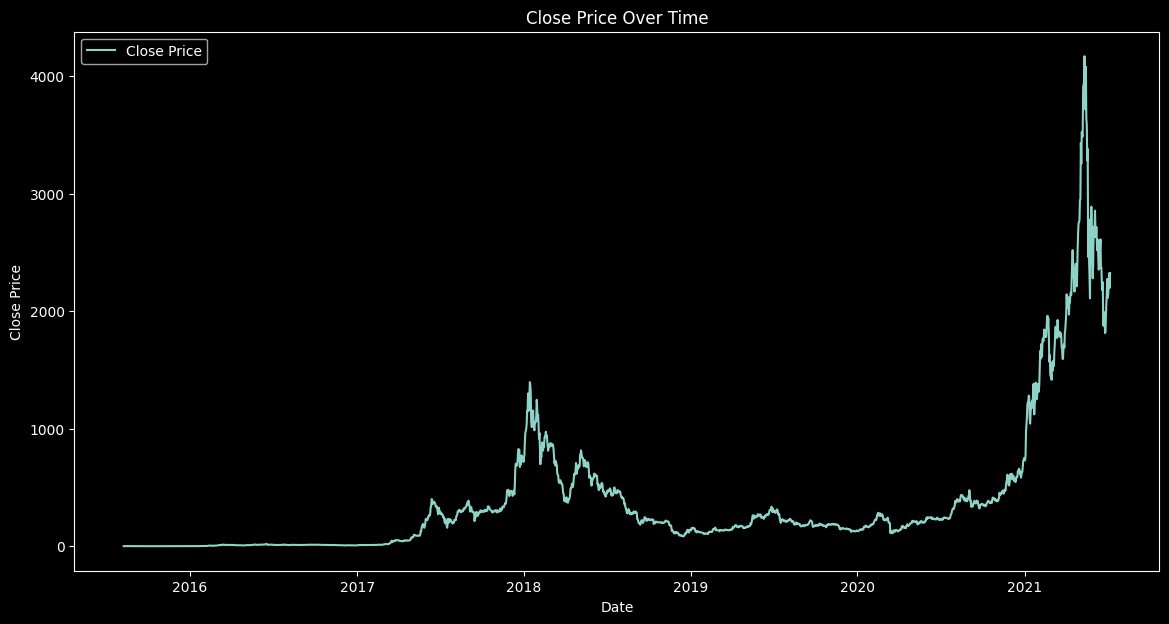

<Figure size 640x480 with 0 Axes>

In [56]:
# Time series plot of closing prices
plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.savefig("plot1.png")


High rise in close price after 2021.
increases variation

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


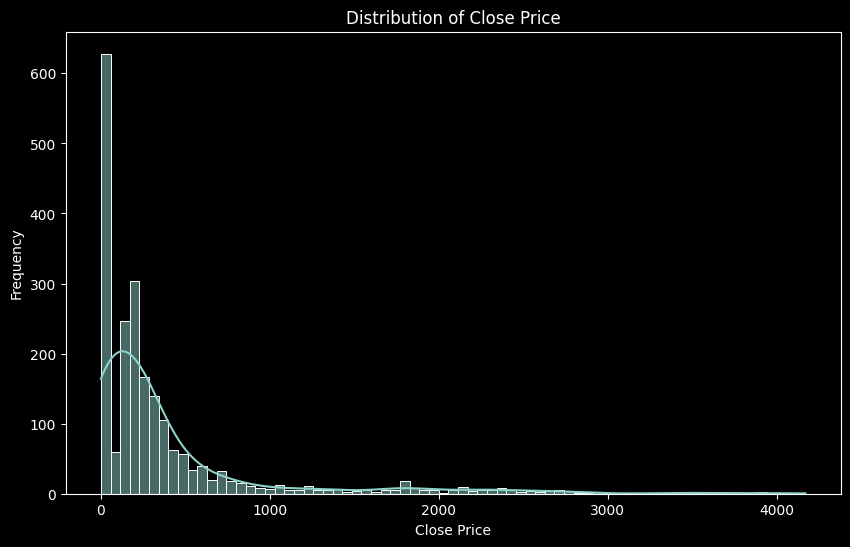

In [57]:
# Create a histogram of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

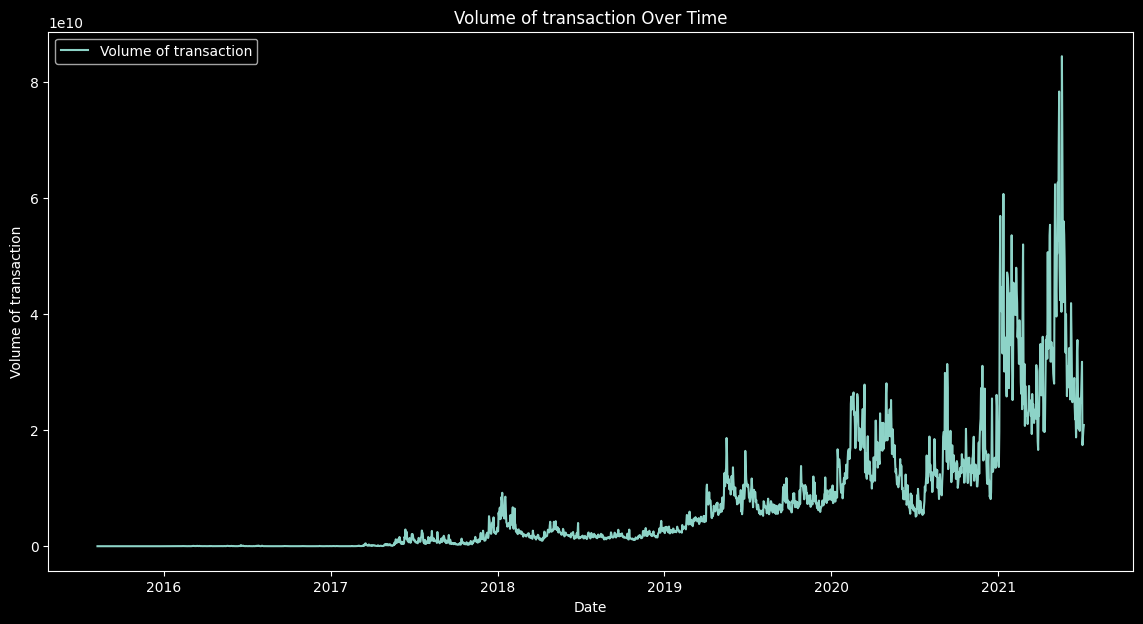

<Figure size 640x480 with 0 Axes>

In [58]:
# Time series plot of Volume of transaction
plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Volume'], label='Volume of transaction')
plt.title('Volume of transaction Over Time')
plt.xlabel('Date')
plt.ylabel('Volume of transaction')
plt.legend()
plt.show()

plt.savefig("plot2.png", dpi=300)

Volume of transaction started rising after 2020 and increade further in 2021. Possibly effecting close price.

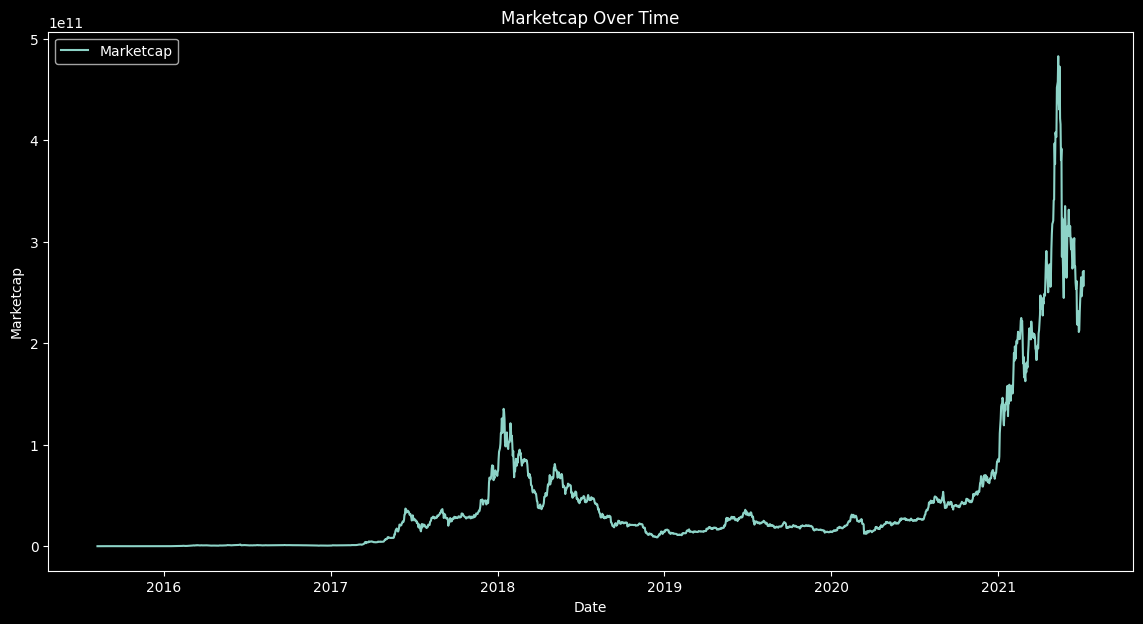

<Figure size 640x480 with 0 Axes>

In [59]:
plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Marketcap'], label='Marketcap')
plt.title('Marketcap Over Time')
plt.xlabel('Date')
plt.ylabel('Marketcap')
plt.legend()
plt.show()

plt.savefig("plot3.png", dpi=300)

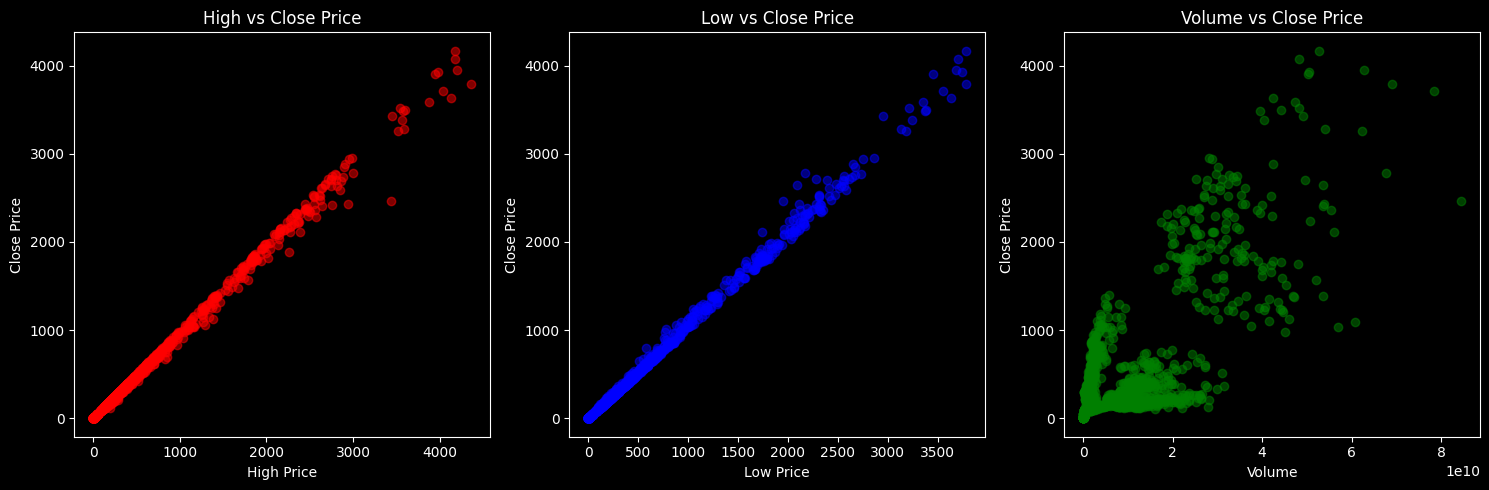

<Figure size 640x480 with 0 Axes>

In [60]:
# Scatter plots of features vs. close price
plt.figure(figsize=(15, 5))

# High vs. Close
plt.subplot(1, 3, 1)
plt.scatter(data['High'], data['Close'], alpha=0.5, color='red')
plt.title('High vs Close Price')
plt.xlabel('High Price')
plt.ylabel('Close Price')

# Low vs. Close
plt.subplot(1, 3, 2)
plt.scatter(data['Low'], data['Close'], alpha=0.5, color='blue')
plt.title('Low vs Close Price')
plt.xlabel('Low Price')
plt.ylabel('Close Price')

# Volume vs. Close
plt.subplot(1, 3, 3)
plt.scatter(data['Volume'], data['Close'], alpha=0.5, color='green')
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

plt.savefig("plot4.png", dpi=300)

Strong relation in high, low and close price

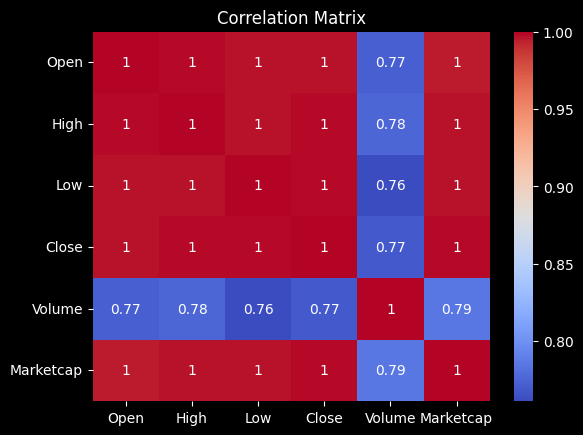

<Figure size 640x480 with 0 Axes>

In [61]:
# Correlation matrix
corr_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.savefig("plot5.png", dpi=300)

# Feature Engineering

A moving average (MA) is a technique used to smooth out short-term fluctuations in time series data, highlighting longer-term trends.

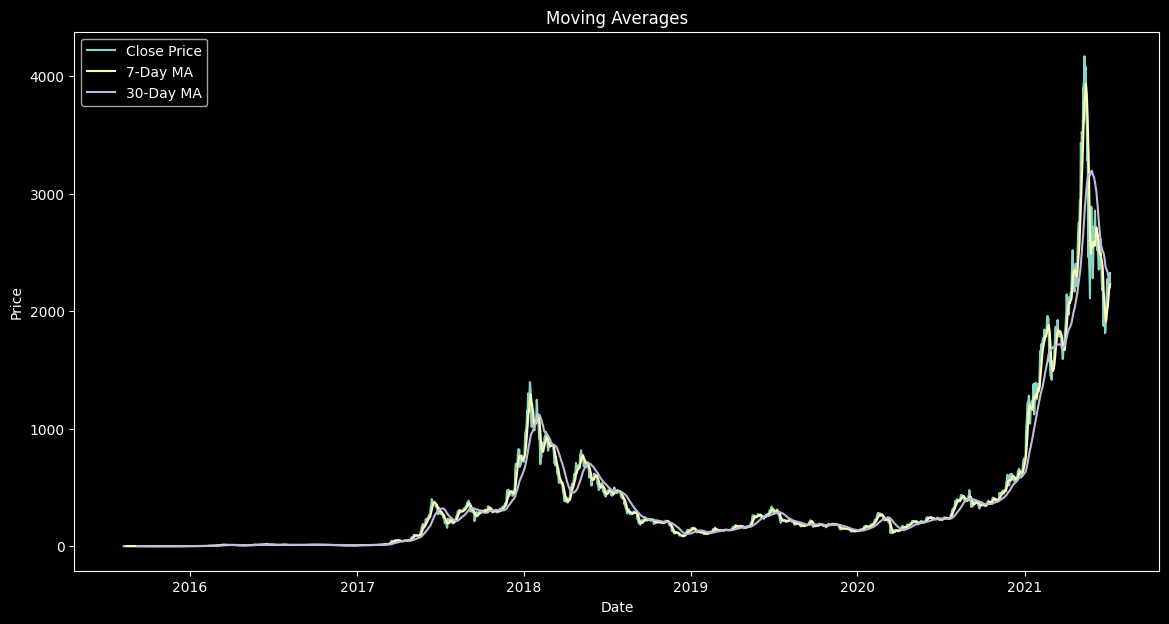

In [62]:
# Moving averages
data['MA_7'] = data['Close'].rolling(window=7).mean()
data['MA_30'] = data['Close'].rolling(window=30).mean()

plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA_7'], label='7-Day MA')
plt.plot(data['Date'], data['MA_30'], label='30-Day MA')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



**for 7-day MA**
this graph indicates that the price movements are stable without significant short-term volatility. This suggests a strong trend without sudden fluctuations.

**for 30-day MA**
The averages differ little then trend especially at peaks.

An Exponential Moving Average (EMA) is a type of moving average that gives more weight to recent data points, making it more responsive to recent price changes. This sensitivity helps in capturing short-term trends more effectively

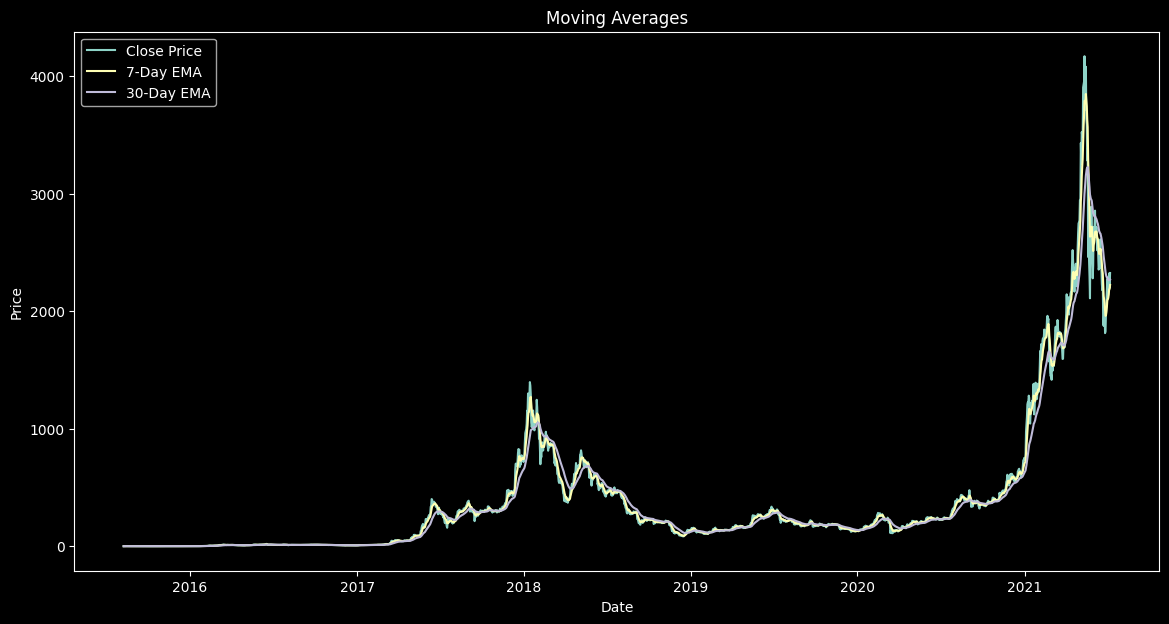

In [63]:
data['EMA_7'] = data['Close'].ewm(span=7, adjust=False).mean()
data['EMA_30'] = data['Close'].ewm(span=30, adjust=False).mean()

plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['EMA_7'], label='7-Day EMA')
plt.plot(data['Date'], data['EMA_30'], label='30-Day EMA')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

this graph indicates that recent price changes are influencing the trend direction significantly.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RSI_14', ylabel='Count'>

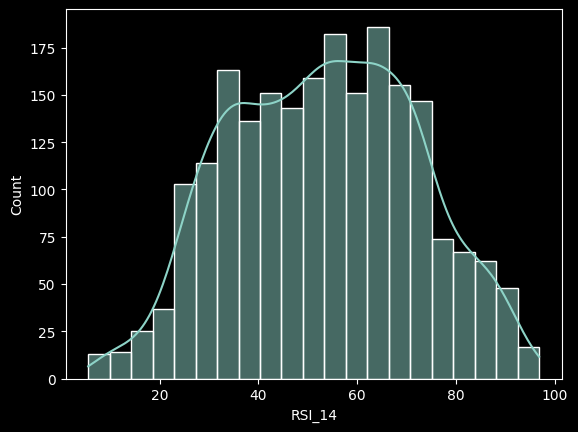

In [64]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI_14'] = calculate_rsi(data)
sns.histplot(data["RSI_14"], kde=True)

Bollinger Bands are a technical analysis tool consisting of a central moving average and two standard deviation lines plotted above and below it. These bands adjust to market volatility

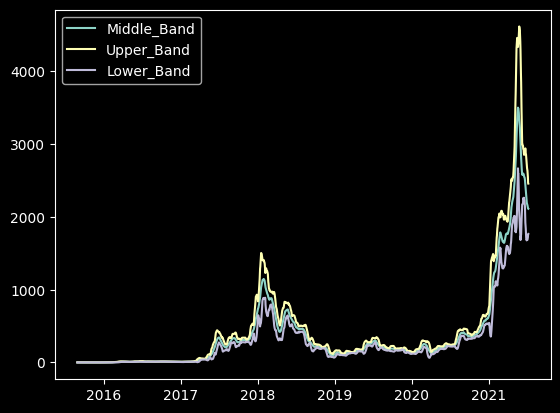

In [65]:
#bollinger bands
data['Middle_Band'] = data['Close'].rolling(window=20).mean()
data['Upper_Band'] = data['Middle_Band'] + 2 * data['Close'].rolling(window=20).std()
data['Lower_Band'] = data['Middle_Band'] - 2 * data['Close'].rolling(window=20).std()

l = ['Middle_Band', 'Upper_Band', 'Lower_Band']
for i in l:
    plt.plot(data['Date'], data[i], label=i)
    plt.legend()

Sudden changes increases volatility

Daily returns are used to assess the day-to-day performance of an asset, track volatility, and make comparisons between different assets.

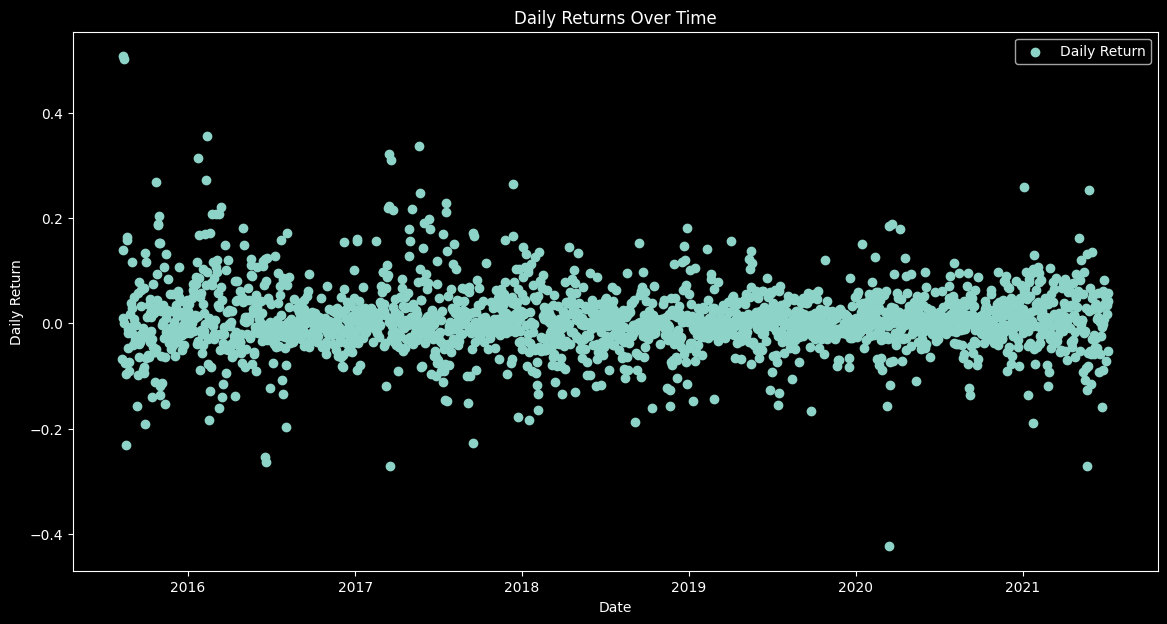

In [67]:
# Daily returns
data['Daily Return'] = data['Close'].pct_change()
plt.figure(figsize=(14, 7))
plt.scatter(data['Date'], data['Daily Return'], label='Daily Return')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

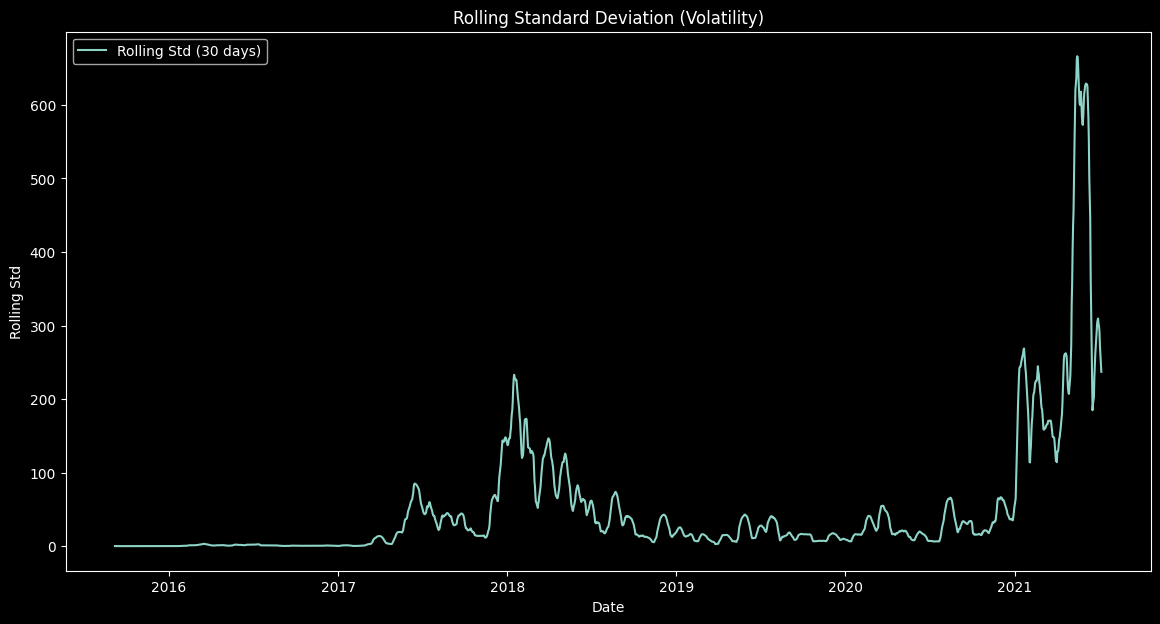

In [68]:
# Calculate and plot the rolling standard deviation (volatility)
data['Rolling Std'] = data['Close'].rolling(window=30).std()
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Rolling Std'], label='Rolling Std (30 days)')
plt.title('Rolling Standard Deviation (Volatility)')
plt.xlabel('Date')
plt.ylabel('Rolling Std')
plt.legend()
plt.show()

In [69]:
data['Close_Lag1'] = data['Close'].shift(1)
data['Close_Lag2'] = data['Close'].shift(2)

In [70]:
data['Rolling_Mean_7'] = data['Close'].rolling(window=7).mean()
data['Rolling_Mean_30'] = data['Close'].rolling(window=30).mean()

In [71]:
data.columns

Index(['Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap', 'MA_7', 'MA_30', 'EMA_7', 'EMA_30', 'RSI_14',
       'Middle_Band', 'Upper_Band', 'Lower_Band', 'Daily Return',
       'Rolling Std', 'Close_Lag1', 'Close_Lag2', 'Rolling_Mean_7',
       'Rolling_Mean_30'],
      dtype='object')

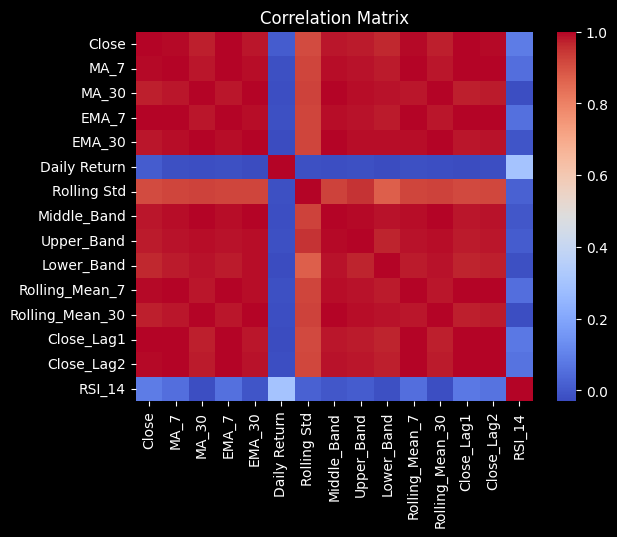

In [72]:
# Correlation matrix
corr_matrix = data[['Close', 'MA_7', 'MA_30', 'EMA_7', 'EMA_30', 'Daily Return', 'Rolling Std', 'Middle_Band', 'Upper_Band', 'Lower_Band','Rolling_Mean_7','Rolling_Mean_30', 'Close_Lag1', 'Close_Lag2', 'RSI_14']].corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [73]:
data.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,MA_7,...,RSI_14,Middle_Band,Upper_Band,Lower_Band,Daily Return,Rolling Std,Close_Lag1,Close_Lag2,Rolling_Mean_7,Rolling_Mean_30
SNo,,,,,,,,,,,,,,,,,,,,,
1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07,NaN,...,NaN,NaN,NaN,NaN,-0.068268,NaN,0.753325,NaN,NaN,NaN
3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07,NaN,...,NaN,NaN,NaN,NaN,0.009333,NaN,0.701897,0.753325,NaN,NaN
4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07,NaN,...,NaN,NaN,NaN,NaN,0.507323,NaN,0.708448,0.701897,NaN,NaN
5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07,NaN,...,NaN,NaN,NaN,NaN,0.140075,NaN,1.067860,0.708448,NaN,NaN


In [74]:
data.describe()

,Date,High,Low,Open,Close,Volume,Marketcap,MA_7,MA_30,EMA_7,...,RSI_14,Middle_Band,Upper_Band,Lower_Band,Daily Return,Rolling Std,Close_Lag1,Close_Lag2,Rolling_Mean_7,Rolling_Mean_30
count,2160,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03,2154.000000,2131.000000,2160.000000,...,2147.000000,2141.000000,2141.000000,2141.000000,2159.000000,2131.000000,2159.000000,2158.000000,2154.000000,2131.000000
mean,2018-07-23 11:59:59,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10,381.840523,374.426779,380.824171,...,53.241795,377.832619,458.404714,297.260523,0.005670,50.162846,383.011771,382.170450,381.840523,374.426779
min,2015-08-08 23:59:59,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07,0.504922,0.605370,0.497361,...,5.571635,0.568665,0.697577,0.217482,-0.423472,0.048761,0.434829,0.434829,0.504922,0.605370
25%,2017-01-29 17:59:59,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09,13.508964,14.123842,13.293508,...,38.193346,13.938530,18.298772,11.003885,-0.022941,2.629742,13.802300,13.785400,13.508964,14.123842
50%,2018-07-23 11:59:59,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10,200.862790,201.146233,202.147586,...,53.599919,202.844050,231.343364,164.381940,0.000720,16.690000,198.415383,198.196690,200.862790,201.146233
75%,2020-01-14 05:59:59,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10,389.501245,382.934948,387.758943,...,67.500111,386.698453,447.550606,322.430157,0.030109,46.389234,386.360081,386.213377,389.501245,382.934948
max,2021-07-06 23:59:59,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11,3933.220270,3194.481554,3847.251386,...,96.808622,3501.588953,4616.910793,2667.637267,0.507323,666.054798,4168.701049,4168.701049,3933.220270,3194.481554
std,NaN,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10,595.619500,576.499777,594.096739,...,18.824069,585.168126,732.919365,446.237587,0.063036,94.384122,599.764030,598.627401,595.619500,576.499777


In [75]:
data.isna().sum()

Name                0
Symbol              0
Date                0
High                0
Low                 0
Open                0
Close               0
Volume              0
Marketcap           0
MA_7                6
MA_30              29
EMA_7               0
EMA_30              0
RSI_14             13
Middle_Band        19
Upper_Band         19
Lower_Band         19
Daily Return        1
Rolling Std        29
Close_Lag1          1
Close_Lag2          2
Rolling_Mean_7      6
Rolling_Mean_30    29
dtype: int64

In [ ]:
median_rsi_14 = data['RSI_14'].median()
data['RSI_14'].fillna(median_rsi_14, inplace=True)

median_ma_7 = data['MA_7'].median()
data['MA_7'].fillna(median_ma_7, inplace=True)

median_ma_30 = data['MA_30'].median()
data['MA_30'].fillna(median_ma_30, inplace=True)

median_rolling_std = data['Rolling Std'].median()
data['Rolling Std'].fillna(median_rolling_std, inplace=True)

median_rolling_mean_7 = data['Rolling_Mean_7'].median()
data['Rolling_Mean_7'].fillna(median_rolling_mean_7, inplace=True)

median_rolling_mean_30 = data['Rolling_Mean_30'].median()
data['Rolling_Mean_30'].fillna(median_rolling_mean_30, inplace=True)

data['Close_Lag1'].fillna(method='bfill', inplace=True)
data['Close_Lag2'].fillna(method='bfill', inplace=True)

data['Upper_Band'].ffill(inplace=True)
data['Upper_Band'].bfill(inplace=True)

data['Middle_Band'].ffill(inplace=True)
data['Middle_Band'].bfill(inplace=True)

data['Lower_Band'].ffill(inplace=True)
data['Lower_Band'].bfill(inplace=True)

data['Daily Return'].fillna(0, inplace=True)


In [77]:
data.isna().sum()

Name               0
Symbol             0
Date               0
High               0
Low                0
Open               0
Close              0
Volume             0
Marketcap          0
MA_7               0
MA_30              0
EMA_7              0
EMA_30             0
RSI_14             0
Middle_Band        0
Upper_Band         0
Lower_Band         0
Daily Return       0
Rolling Std        0
Close_Lag1         0
Close_Lag2         0
Rolling_Mean_7     0
Rolling_Mean_30    0
dtype: int64

# Scaling and Normalization

In [78]:
for column in data.columns:
    if column in ['Name', 'Symbol', 'Date']:
        continue
    data[column] = np.log1p(data[column])

In [79]:
X = data.drop(["Name", "Symbol", "Close", "Date"], axis=1)
Y = data["Close"]

In [80]:
import sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Feature Selection

In [81]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Specify the number of features to select
X_rfe = rfe.fit_transform(X, Y)

print("Selected features:", X.columns[rfe.support_])

Selected features: Index(['High', 'Low', 'Open', 'Daily Return', 'Close_Lag1'], dtype='object')


# Model Selection

In [82]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [83]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'Decision Tree': DecisionTreeRegressor()
}

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, Y, test_size=0.25, random_state=42)

In [85]:
results = {}

for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = -cv_scores.mean()
    
    # Train the model on the full training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[name] = {'Cross-Validated MSE': mean_cv_score, 'Test MSE': mse, 'R²': r2}

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Cross-Validated MSE: {metrics['Cross-Validated MSE']:.4f}")
    print(f"  Test MSE: {metrics['Test MSE']:.4f}")
    print(f"  R²: {metrics['R²']:.4f}\n")


Model: Linear Regression
  Cross-Validated MSE: 0.0001
  Test MSE: 0.0001
  R²: 1.0000

Model: Random Forest
  Cross-Validated MSE: 0.0011
  Test MSE: 0.0008
  R²: 0.9998

Model: Gradient Boosting
  Cross-Validated MSE: 0.0013
  Test MSE: 0.0008
  R²: 0.9998

Model: Support Vector Regressor
  Cross-Validated MSE: 0.0020
  Test MSE: 0.0017
  R²: 0.9995

Model: Decision Tree
  Cross-Validated MSE: 0.0018
  Test MSE: 0.0014
  R²: 0.9996



# Model Training

In [86]:
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()

# Train the model on the full training set
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [87]:
y_pred = model.predict(X_test)

In [88]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

8.613661048559182e-05
0.9999765242450652


In [89]:
model.coef_


array([ 0.14390276,  0.14601682, -0.1331012 ,  0.74852421,  0.84358906])

In [90]:
model.intercept_

-0.0013643221292278795

In [91]:
pred = model.predict([X_test[1]])
print(pred)
y_test.iloc[1]

[5.57648133]


5.581486785093278

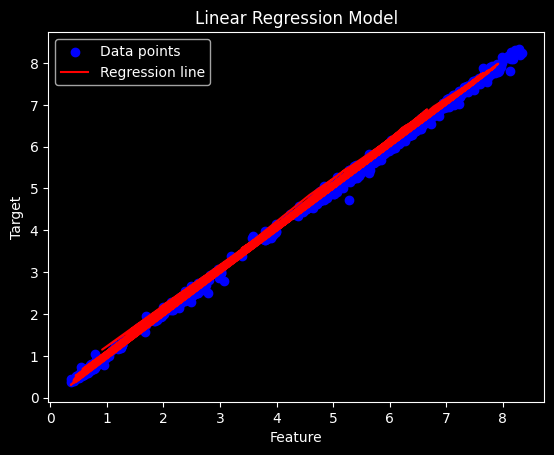

<Figure size 640x480 with 0 Axes>

In [92]:
# Plot the data and the regression line
plt.scatter(X_train[:,[-1]], y_train, color="blue", label="Data points")
plt.plot(X_test[:,[1]], y_pred, color="red", label="Regression line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Model")
plt.legend()
plt.show()

plt.savefig("plot6d.png", dpi=300)

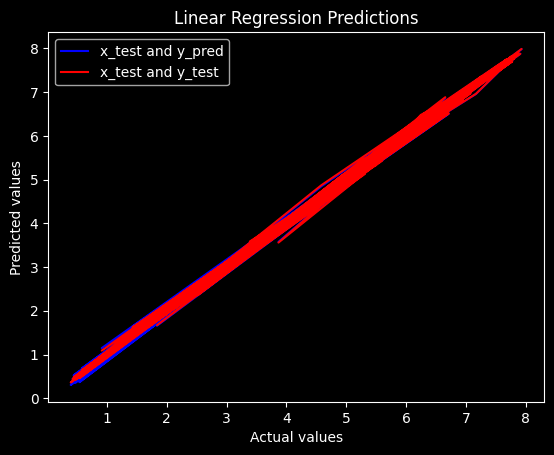

In [93]:
# Plot the actual vs predicted values
plt.plot(X_test[:,[4]], y_pred, color="blue", label="x_test and y_pred")
plt.plot(X_test[:,[4]], y_test, color="red", label="x_test and y_test")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

# Save Model

In [94]:
import joblib

In [95]:
joblib.dump(model, 'ethereum_model.pkl')

['ethereum_model.pkl']

# Coding Linear Regression

In [96]:
class LinearRegressionCoded:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [97]:
new_model = LinearRegressionCoded()
new_model.fit(X_train, y_train)
new_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

8.613661048559182e-05
0.9999765242450652


In [98]:
test_set = pd.DataFrame(X_test, columns=X.columns[rfe.support_])
test_set['close_price'] = list(y_test)
test_set.head()

,High,Low,Open,Daily Return,Close_Lag1,close_price
0,7.823400,7.755631,7.796050,-0.036451,7.796858,7.760422
1,5.592903,5.512779,5.519856,0.062415,5.519315,5.581487
2,7.680726,7.659580,7.667232,0.010115,7.667131,7.677242
3,5.650786,5.632899,5.649963,-0.011806,5.648858,5.637094
4,5.705095,5.676394,5.682743,0.000666,5.681752,5.682416


In [99]:
test_set.to_csv("test_set_ethereum.csv", index=False)